In [1]:

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

## Redaing the pictures

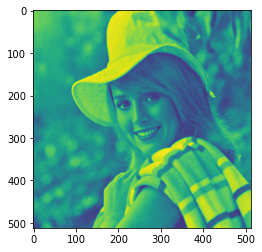

In [1]:
# without equalization
import cv2
import matplotlib.pyplot as plt


picture1  = cv2.imread("Elaine.bmp" )
picture1  = cv2.cvtColor(picture1, cv2.COLOR_BGR2GRAY)
picture = picture1
# plt.imshow(picture)
plt.imshow(picture)

In [8]:
print(picture.shape)

(512, 512)


The given picture has one channel, and its histogram can be seen below, illustrating the number of pixels with a specific value.

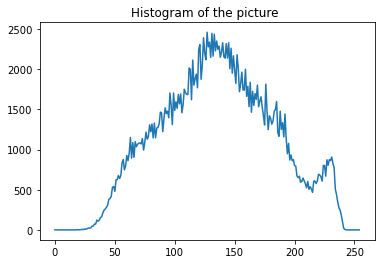

In [6]:
plt.plot(cv2.calcHist([picture],[0] , None ,[255] , [0 , 255]))
plt.title("Histogram of the picture ")
plt.show()

## Quantization 
We consider some numbers inluding 4 , 8 ,16 , 32 , 64 , 128 and 255 and quantize the picture, using these numbers.

In [7]:
for i in range (512):
    for j in range(512):
        if picture[i][j] < 4 :
            picture[i][j] = 4
        elif picture[i][j]>4 and picture[i][j] < 8:
            picture[i][j] = 4
        elif picture[i][j] > 8 and picture[i][j]<16 :
            picture[i][j] = 8
        elif picture[i][j] >16 and picture[i][j] < 32 :
            picture[i][j] = 16 
        elif picture[i][j] > 32 and picture[i][j] < 64 :
            picture[i][j] = 32
        elif picture[i][j] >64 and picture[i][j] < 128 :
            picture[i][j] = 64
        elif picture[i][j] > 128 and picture[i][j] <255 :
            picture[i][j] = 128

## Quantized picture :

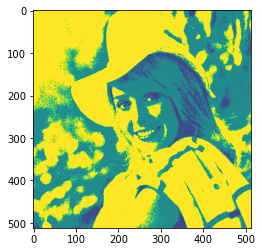

In [4]:
plt.imshow(picture)

Now we calculate the MSE between the original and quantized images for different gray values .

In [18]:
import numpy as np
picture1  = cv2.imread("Elaine.bmp" )
picture1  = cv2.cvtColor(picture1, cv2.COLOR_BGR2GRAY)
mse = np.zeros(6)
for i in range(512) : 
    for  j  in range(512) :
        if picture[i][j] == 4 : 
            mse[0] += ((picture[i][j] - picture1[i][j])**2)
        elif picture[i][j] == 8 : 
            mse[1] += ((picture[i][j] - picture1[i][j])**2)
        elif picture[i][j] == 16 : 
            mse[2] += ((picture[i][j] - picture1[i][j])**2)
        elif picture[i][j] == 32 : 
            mse[3] += ((picture[i][j] - picture1[i][j])**2)
        elif picture[i][j] == 64 : 
            mse[4] += ((picture[i][j] - picture1[i][j])**2)
        elif picture[i][j] == 128 : 
            mse[5] += ((picture[i][j] - picture1[i][j])**2)

C:\Users\Soroush\AppData\Local\Temp\ipykernel_11508\1424715345.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  mse[5] += ((picture[i][j] - picture1[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_11508\1424715345.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  mse[4] += ((picture[i][j] - picture1[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_11508\1424715345.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  mse[3] += ((picture[i][j] - picture1[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_11508\1424715345.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  mse[2] += ((picture[i][j] - picture1[i][j])**2)


In [21]:
print("MSE :"  )
mse = np.sqrt(mse)
print(mse)

MSE :
[4.00000000e+00 0.00000000e+00 3.29207184e+03 2.89989711e+04
 6.84460065e+04 8.30837331e+04]


Drawing histogram of the quantized image .

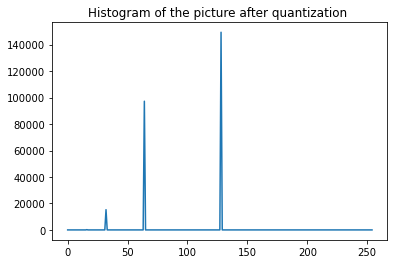

In [5]:
plt.plot(cv2.calcHist([picture],[0] , None ,[255] , [0 , 255]))
plt.title("Histogram of the picture after quantization ")
plt.show()

## Equalization

In [12]:
# with equalization
import numpy as np
import math
picture2  = cv2.imread("Elaine.bmp" )
picture2  = cv2.cvtColor(picture2, cv2.COLOR_BGR2GRAY)

pix = np.zeros(256)
for i in range(512):
    for j in range(512) :
        value_of_pixel = picture2[i][j]
        
        pix[value_of_pixel] += 1
pix /= (512 * 512)
for k in range(1 , 256) :
    pix[k] += pix[k -1]

for i in range(256) :
    pix[i] *= 255
    pix[i] = round(pix[i])
print(pix)






[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.
   2.   2.   2.   3.   3.   3.   4.   4.   5.   6.   6.   7.   7.   8.
   9.  10.  11.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
  22.  23.  24.  25.  26.  27.  28.  30.  31.  32.  33.  34.  36.  37.
  38.  39.  40.  42.  43.  45.  46.  47.  49.  50.  51.  53.  54.  56.
  57.  59.  60.  62.  63.  65.  67.  68.  70.  71.  73.  74.  76.  78.
  80.  82.  83.  85.  87.  89.  91.  93.  95.  97.  99. 101. 103. 105.
 107. 110. 112. 114. 116. 119. 121. 123. 125. 128. 130. 132. 134. 136.
 139. 141. 143. 145. 147. 149. 151. 153. 155. 157. 159. 161. 163. 165.
 167. 169. 171. 172. 174. 176. 178. 179. 181. 183. 184. 186. 187. 189.
 190. 192. 194. 195. 197. 198. 200. 201. 203. 204. 205. 207. 208. 209.
 211. 212. 214. 215. 216. 218. 219. 220. 221. 223. 224. 225. 226. 227.
 228. 

In [13]:
# pix is a LUT and we equalize our picture with this LUT
for i in range(512) :
    for j in range(512) :
        picture2[i][j] = pix[picture2[i][j]]


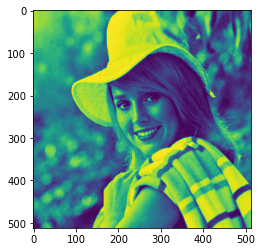

In [14]:
plt.imshow(picture2)

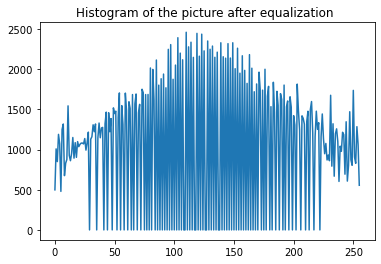

In [15]:
plt.plot(cv2.calcHist([picture2],[0] , None ,[256] , [0 , 256]))
plt.title("Histogram of the picture after equalization ")
plt.show()

In [16]:
for i in range (512):
    for j in range(512):
        if picture2[i][j] < 4 :
            picture2[i][j] = 4
        elif picture2[i][j]>4 and picture2[i][j] < 8:
            picture2[i][j] = 4
        elif picture2[i][j] > 8 and picture2[i][j]<16 :
            picture2[i][j] = 8
        elif picture2[i][j] >16 and picture2[i][j] < 32 :
            picture2[i][j] = 16 
        elif picture2[i][j] > 32 and picture2[i][j] < 64 :
            picture2[i][j] = 32
        elif picture2[i][j] >64 and picture2[i][j] < 128 :
            picture2[i][j] = 64
        elif picture2[i][j] > 128 and picture2[i][j] <255 :
            picture2[i][j] = 128

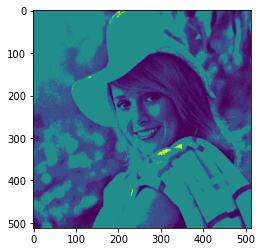

In [17]:
plt.imshow(picture2)

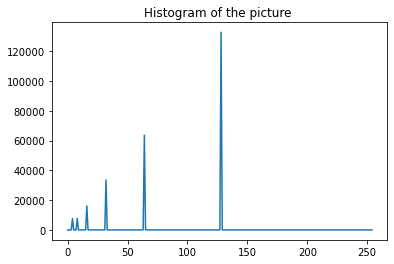

In [18]:
plt.plot(cv2.calcHist([picture2],[0] , None ,[255] , [0 , 255]))
plt.title("Histogram of the picture ")
plt.show()

In [21]:
import numpy as np
picture3  = cv2.imread("Elaine.bmp" )
picture3  = cv2.cvtColor(picture3, cv2.COLOR_BGR2GRAY)
mse1 = np.zeros(6)
for i in range(512) : 
    for  j  in range(512) :
        if picture2[i][j] == 4 : 
            mse1[0] += ((picture2[i][j] - picture3[i][j])**2)
        elif picture2[i][j] == 8 : 
            mse1[1] += ((picture2[i][j] - picture3[i][j])**2)
        elif picture2[i][j] == 16 : 
            mse1[2] += ((picture2[i][j] - picture3[i][j])**2)
        elif picture2[i][j] == 32 : 
            mse1[3] += ((picture2[i][j] - picture3[i][j])**2)
        elif picture2[i][j] == 64 : 
            mse1[4] += ((picture2[i][j] - picture3[i][j])**2)
        elif picture2[i][j] == 128 : 
            mse1[5] += ((picture2[i][j] - picture3[i][j])**2)

C:\Users\Soroush\AppData\Local\Temp\ipykernel_960\3034801308.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  mse1[5] += ((picture2[i][j] - picture3[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_960\3034801308.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  mse1[4] += ((picture2[i][j] - picture3[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_960\3034801308.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  mse1[3] += ((picture2[i][j] - picture3[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_960\3034801308.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  mse1[2] += ((picture2[i][j] - picture3[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_960\3034801308.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  mse1[1] += ((picture2[i][j] - picture3[i][j])**2)
C:\Users\Soroush\AppData\Local\Temp\ipykernel_960\3034801308.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  mse1[0]

In [22]:
print("MSE :"  )
mse1 = np.sqrt(mse1)
print(mse1)

MSE :
[18696.31479731 18107.0632351  25442.95902603 36119.23940229
 50601.89771145 77546.31189812]
